In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import warnings
warnings.filterwarnings('ignore')

import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

In [2]:
app_train=pd.read_csv('/Users/naimboraatlay/Desktop/ppi_ag/bootcamp/datasets/home-credit-default-risk/application_train.csv')

In [3]:
#fig, axs = plt.subplots(ncols=3, figsize=(15,5))
#sns.scatterplot(data=app_train, x="AMT_CREDIT", y="AMT_ANNUITY", ax=axs[0])
#sns.scatterplot(data=app_train, x="AMT_CREDIT", y="AMT_GOODS_PRICE", ax=axs[1])
#sns.scatterplot(data=app_train, x="AMT_GOODS_PRICE", y="AMT_ANNUITY", ax=axs[2])

In [4]:
#corr=app_train_selected_features.corr()
#corr.style.background_gradient(cmap='coolwarm').set_precision(2)

In [5]:
#app_train_selected_features = app_train[['AMT_INCOME_TOTAL','AMT_CREDIT', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY', 'CNT_FAM_MEMBERS', 'OCCUPATION_TYPE', 'NAME_INCOME_TYPE', 'NAME_FAMILY_STATUS', 'NAME_EDUCATION_TYPE', 'AMT_GOODS_PRICE', 'NAME_HOUSING_TYPE', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DEF_60_CNT_SOCIAL_CIRCLE','TARGET']]

<AxesSubplot:xlabel='EXT_SOURCE_3', ylabel='Count'>

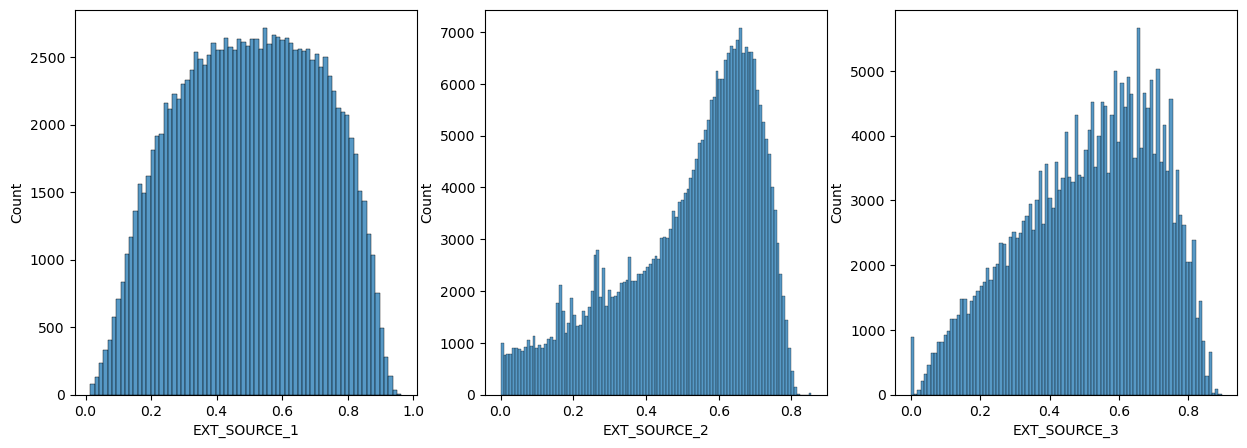

In [6]:
fig, axs = plt.subplots(ncols=3, figsize=(15,5))
sns.histplot(data=app_train, x="EXT_SOURCE_1", ax=axs[0])
sns.histplot(data=app_train, x="EXT_SOURCE_2", ax=axs[1])
sns.histplot(data=app_train, x="EXT_SOURCE_3", ax=axs[2])

In [7]:
ext_src_list = ["EXT_SOURCE_1", "EXT_SOURCE_2", "EXT_SOURCE_3"]
for src in ext_src_list:
    print(f'The total number of NaN values in {src} is {app_train[src].isna().sum()}.')

The total number of NaN values in EXT_SOURCE_1 is 173378.
The total number of NaN values in EXT_SOURCE_2 is 660.
The total number of NaN values in EXT_SOURCE_3 is 60965.


- Since all three external different rankings are scaled between 0-1 we can consider the mean of the three values rather than treating them individually.
- Down below the mean of the three external source informations will be calculated. Calculation of mean doesnt consider nan values. i.e. if for a client only two sources of external ranking are available, the mean is calculated w.r.t. only those two rankings.


In [8]:
app_train['EXT_SOURCE_AVG'] = app_train[["EXT_SOURCE_1", "EXT_SOURCE_2", "EXT_SOURCE_3"]].mean(axis=1)

In [9]:
app_train['EXT_SOURCE_AVG'].isna().sum()

172

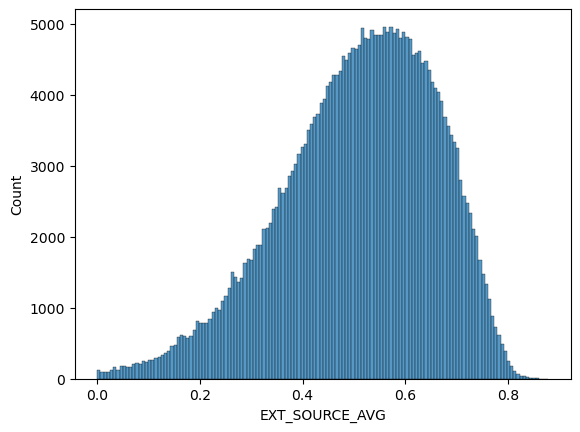

In [10]:
extsrc_avg_histplt = sns.histplot(data=app_train, x="EXT_SOURCE_AVG")

In [11]:
app_train['EXT_SOURCE_AVG_BOOL'] = 1
app_train.loc[np.isnan(app_train['EXT_SOURCE_AVG']), 'EXT_SOURCE_AVG_BOOL'] = 0

app_train['EXT_SOURCE_AVG'] = app_train['EXT_SOURCE_AVG'].fillna(0)

app_train.drop(["EXT_SOURCE_1", "EXT_SOURCE_2", "EXT_SOURCE_3"], axis=1, inplace=True)

In [12]:
### Bucketing the DEF_60_CNT_SOCIAL_CIRCLE feature into categories as
### if there is a default in the circle of client within the last 60 days or not.
### Then the NaN Values are handled as for EXT_SOURCE_* features.

app_train.loc[app_train['DEF_60_CNT_SOCIAL_CIRCLE']  > 0, 'DEF_60_CNT_SOCIAL_CAT'] = 1
app_train.loc[app_train['DEF_60_CNT_SOCIAL_CIRCLE'] == 0, 'DEF_60_CNT_SOCIAL_CAT'] = 0

app_train.loc[np.isnan(app_train['DEF_60_CNT_SOCIAL_CIRCLE']), 'DEF_60_CNT_SOCIAL_CAT'] = -1

app_train["DEF_60_CNT_SOCIAL_BOOL"] = 1
app_train.loc[app_train['DEF_60_CNT_SOCIAL_CAT'] == -1, 'DEF_60_CNT_SOCIAL_BOOL'] = 0

ADDITIONAL COLUMNS TO BE CONSIDERED:

- EXT_SOURCE_AVG (continuous, float)
- EXT_SOURCE_AVG_BOOL (boolean)

- DEF_60_CNT_SOCIAL_CAT (discrete, int)
- DEF_60_CNT_SOCIAL_BOOL (boolean)